In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyser import *

plt.style.use('ggplot')

In [4]:
subs = generate_submissions(users=50, pbls=4)
#subs = import_submissions(course_id = "C00198", dbname="test1")
bm = bianary_mat(subs)

In [5]:
from itertools import product

def tot_vec(subs):
    '''
    '''

    # get lists of unique users and pbls
    users = subs.user_id.unique()
    pbls = subs.problem_id.unique()
    table = pd.DataFrame(data = 0, columns=users , index=pbls)

    #couples = subs[subs.veredict == "AC"][["user_id","problem_id"]].values
    for u, p in product(users, pbls):
        table[u][p] = subs[(subs.user_id == u) & (subs.problem_id == p)].submission_uid.count()

    return table

def succes_mat(subs):
    '''
    '''

    # get lists of unique users and pbls
    users = subs.user_id.unique()
    pbls = subs.problem_id.unique()
    table = pd.DataFrame(data = 0, columns=users , index=pbls)

    #couples = subs[subs.veredict == "AC"][["user_id","problem_id"]].values
    for u, p in product(users, pbls):
        table[u][p] = subs[(subs.user_id == u) & (subs.problem_id == p) & 
                           (subs.veredict == "AC")].submission_uid.count()

    return table


In [6]:
def succes_means(subs, col_name='problem_id'):
    
    idx = subs[col_name].unique()
    df = pd.DataFrame(index=idx, columns=["tots", "goods", "means"])


    for i in idx:
        #print dfProbs
        df.tots[i] = subs[(subs[col_name] == i)].submission_uid.count()
        df.goods[i] = subs[(subs[col_name] == i) & (subs.veredict == "AC")].submission_uid.count()
        if df.tots[i]:
            df.means[i] = float(df.goods[i]) / df.tots[i]

    return df


In [7]:
pblsLev = succes_means(subs)
pblsLev

,tots,goods,means
P00000,136,19,0.139706
P00001,126,27,0.214286
P00002,107,17,0.158879
P00003,105,13,0.12381


In [8]:
UsrLev = succes_means(subs, col_name="user_id")
UsrLev

,tots,goods,means
U00000,8,1,0.125
U00001,6,3,0.5
U00002,5,0,0
U00003,9,3,0.333333
U00004,12,3,0.25
U00005,9,1,0.111111
U00006,9,2,0.222222
U00007,9,0,0
U00008,12,1,0.0833333
U00009,6,1,0.166667


# Initialisation

In [9]:
Difficulties = pd.Series(pblsLev.means, index=bm.index, name='Diff_0')
normalize(Difficulties)
Abilities = pd.Series(UsrLev.means, index=bm.columns, name='Abil_0')
normalize(Abilities)

In [10]:
dfAbl = pd.DataFrame(Abilities)
dfDiff = pd.DataFrame(Difficulties)

In [11]:
dfAbl

,Abil_0
U00000,0.0811771
U00001,0.324709
U00002,0
U00003,0.216472
U00004,0.162354
U00005,0.0721575
U00006,0.144315
U00007,0
U00008,0.0541181
U00009,0.108236


In [12]:
dfDiff

,Diff_0
P00000,0.429088
P00001,0.658151
P00002,0.487975
P00003,0.380265


# First Iteration

In [13]:
i = 1

In [14]:
Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
i+=1

In [15]:
dfAbl[Abilities.name] = Abilities
dfDiff[Difficulties.name] = Difficulties

In [16]:
dfDiff

,Diff_0,Diff_1
P00000,0.429088,0.485095
P00001,0.658151,0.659513
P00002,0.487975,0.486572
P00003,0.380265,0.304915


In [17]:
dfAbl

,Abil_0,Abil_1
U00000,0.0811771,0.099292
U00001,0.324709,0.245580
U00002,0,0.000000
U00003,0.216472,0.218453
U00004,0.162354,0.245580
U00005,0.0721575,0.045906
U00006,0.144315,0.172547
U00007,0,0.000000
U00008,0.0541181,0.073255
U00009,0.108236,0.073255


# Let's Iterate !

In [18]:
cnt = 5
for i in range(2,2+cnt):
    Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl[Abilities.name] = Abilities
    dfDiff[Difficulties.name] = Difficulties


In [19]:
dfDiff

,Diff_0,Diff_1,Diff_2,Diff_3,Diff_4,Diff_5,Diff_6
P00000,0.429088,0.485095,0.466084,0.460437,0.458772,0.458280,0.458135
P00001,0.658151,0.659513,0.672050,0.675824,0.676977,0.677331,0.677439
P00002,0.487975,0.486572,0.481199,0.479993,0.479705,0.479630,0.479610
P00003,0.380265,0.304915,0.315534,0.317595,0.317983,0.318052,0.318062


<IPython.core.display.Javascript object>


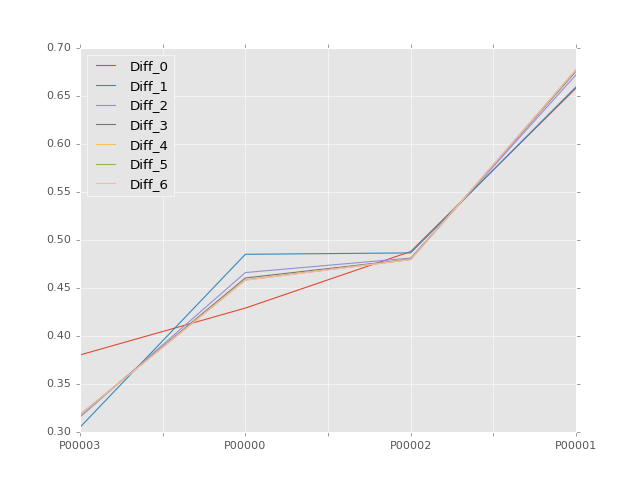

In [20]:
dfDiff.sort_values(['Diff_0'], inplace=True)
dfDiff.plot()

In [21]:
dfAbl

,Abil_0,Abil_1,Abil_2,Abil_3,Abil_4,Abil_5,Abil_6
U00000,0.0811771,0.099292,0.101137,0.101701,0.101875,0.101928,0.101944
U00001,0.324709,0.245580,0.243694,0.243222,0.243101,0.243069,0.243060
U00002,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
U00003,0.216472,0.218453,0.221037,0.221727,0.221915,0.221967,0.221982
U00004,0.162354,0.245580,0.243694,0.243222,0.243101,0.243069,0.243060
U00005,0.0721575,0.045906,0.047485,0.047793,0.047852,0.047862,0.047863
U00006,0.144315,0.172547,0.173553,0.173933,0.174063,0.174105,0.174118
U00007,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
U00008,0.0541181,0.073255,0.072416,0.072232,0.072188,0.072177,0.072174
U00009,0.108236,0.073255,0.072416,0.072232,0.072188,0.072177,0.072174


<IPython.core.display.Javascript object>


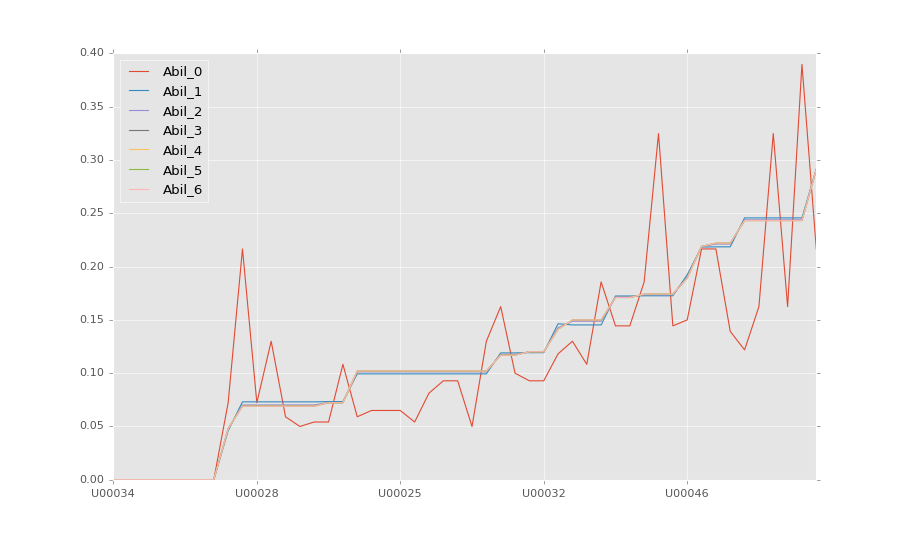

In [23]:
dfAbl.sort_values(['Abil_6'], inplace=True)
dfAbl.plot()